In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os

In [210]:
path = '/home/shaig93/Documents/spt_data_damir/ASCIIdata_splib07a/ChapterM_Minerals/'

In [287]:
def file_read(path):
    fnm, mnr_nms, data = [], [], []
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            fnm.append(filename)
            pand = pd.read_csv(path+filename)
            data_ = np.squeeze(pand.to_numpy())
            data_ = data_[data_>0]
            data.append(data_)
            mnr_nms.append(pand.columns[0].split('_')[0].split(' ')[3])
    mnr_nm = np.unique(mnr_nms)
    data = np.array(data, dtype = 'object')
    return(data, np.array(mnr_nms), mnr_nm)

In [288]:
dt, mnrl_all, mnrl_unique = file_read(path)

In [290]:
mnrl_all.shape, dt.shape, mnrl_unique.shape

((1276,), (1276,), (212,))

227
1013


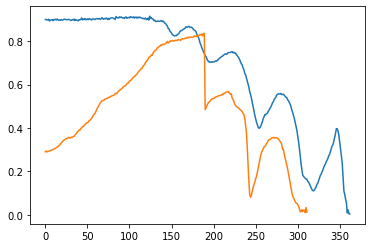

In [318]:
for i in range(len(dt)):
    if dt[i].shape[0]<400:
        plt.plot(dt[i])
        print(i)

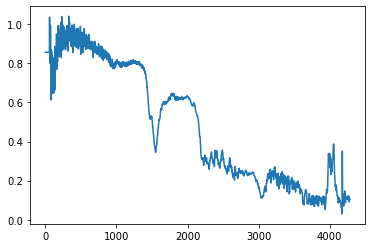

In [313]:
plt.plot(dt[485])

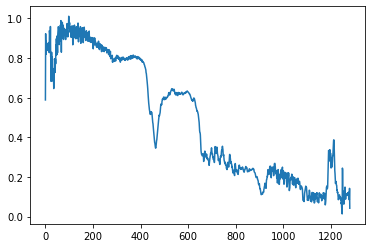

In [530]:
plt.plot(scipy.signal.resample(dt[485], 1280))

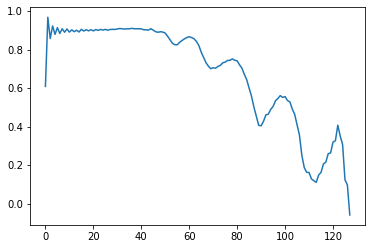

In [322]:
plt.plot(scipy.signal.resample(dt[227], 128))

In [420]:
mnr_nms[485]

'Karpatite'

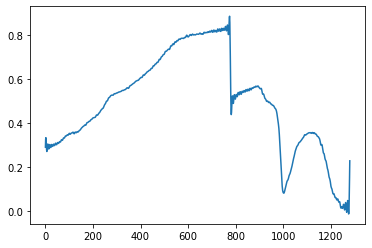

In [532]:
plt.plot(scipy.signal.resample(dt[1013], 1280))

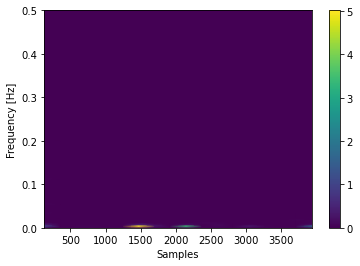

In [421]:
f, t, Sxx = signal.spectrogram(dt[485], 1)
#Sxx[Sxx>2] = Sxx[Sxx<2].max()
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Samples')
plt.colorbar()
plt.show()

In [392]:
f.shape, t.shape, Sxx.shape, Sxx.max()

((65,), (1,), (65, 1), 1.6158277340141318)

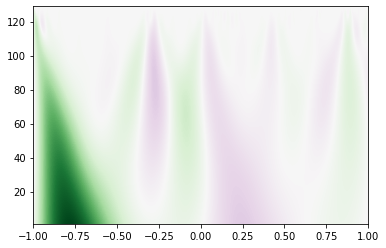

In [551]:
resmpl = scipy.signal.resample(dt[485], 1280)
cwtmatr = scipy.signal.cwt(resmpl, scipy.signal.ricker, np.arange(1, 129))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 129], cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [550]:
sp0

0

In [552]:
sp0 = int(cwtmatr.shape[0]/128)
sp1 = int(cwtmatr.shape[1]/128)

In [553]:
# Down sample shit
new = np.ones((128+1, 128+1))
for i in range(int(cwtmatr.shape[0]/(cwtmatr.shape[0]/128))):
    for j in range(int(cwtmatr.shape[1]/(cwtmatr.shape[1]/128))):
        new[i, j] = np.mean(cwtmatr[i*sp0:i*(sp0+1), j*sp1:j*(sp1+1)])

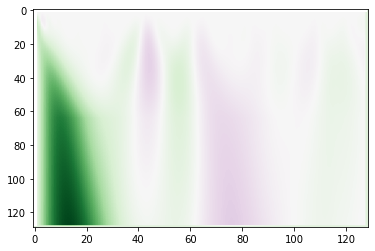

In [554]:
plt.imshow(new, cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

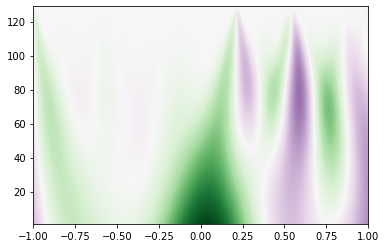

In [539]:
resmpl = scipy.signal.resample(dt[1013], 1280)
cwtmatr = scipy.signal.cwt(resmpl, scipy.signal.ricker, np.arange(1, 128))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 129], cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [540]:
cwtmatr.shape, dt[1013].shape

((127, 1280), (312,))

In [541]:
# Down sample shit
sp0 = int(cwtmatr.shape[0]/128)
sp1 = int(cwtmatr.shape[1]/128)
new = np.ones((128+1, 128+1))
for i in range(int(cwtmatr.shape[0]/(cwtmatr.shape[0]/128))):
    for j in range(int(cwtmatr.shape[1]/(cwtmatr.shape[1]/128))):
        new[i, j] = np.mean(cwtmatr[i*sp0:i*(sp0+1), j*sp1:j*(sp1+1)])

In [544]:
sp0

0

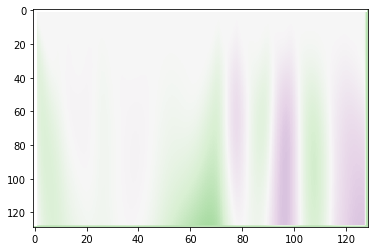

In [543]:
plt.imshow(new, cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

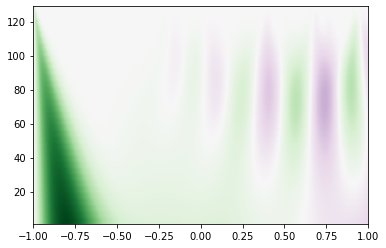

In [430]:
cwtmatr = scipy.signal.cwt(dt[227], scipy.signal.ricker, np.arange(1, int(dt[227].shape[0]/10)))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 129], cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [431]:
cwtmatr.shape

(35, 363)